In [1]:
# import libraries for dataframe and visualizations
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
import plotly as py
import plotly.graph_objs as go
from scipy.stats import chi2_contingency

from plotly.offline import init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)

# import required libraries for clustering
import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree
from sklearn.decomposition import PCA
from scipy.stats import pointbiserialr


In [2]:
# Reading the data on which analysis needs to be done

df_uti = pd.read_csv("final_dataset.csv", encoding = 'unicode_escape', index_col = 0)

In [3]:
df_uti.head()

,Age,Sex,Ethnicity,Marital Status,Clarity,Color,Transparency,Spec Gravity,pH Level,Leukocytes,...,Urobilinogen,Bilirubin,Blood,Bacteria,Epithelial Cells,RBC,WBC,Mucus Threads,Amorphous Urate/Phosphate,DIAGNOSIS
Patient Number,,,,,,,,,,,,,,,,,,,,,
1,23.0,FEMALE,FILIPINO,SINGLE,INCREASED,YELLOW,CLEAR,1.005,5.0,NEGATIVE,...,NORMAL,NEGATIVE,NEGATIVE,FEW,FEW,0-2,0-2,FEW,RARE,NEGATIVE
2,44.0,FEMALE,FILIPINO,MARRIED,DECREASED,YELLOW,CLOUDY,1.020,6.0,NEGATIVE,...,NORMAL,NEGATIVE,2+,FEW,MANY,20-30,0-2,MANY,RARE,NEGATIVE
3,22.0,FEMALE,FILIPINO,SINGLE,DECREASED,DARK YELLOW,HAZY,1.025,6.0,NEGATIVE,...,NORMAL,NEGATIVE,NEGATIVE,MODERATE,MODERATE,0-2,0-2,FEW,FEW,NEGATIVE
4,16.0,FEMALE,FILIPINO,SINGLE,DECREASED,DARK YELLOW,HAZY,1.020,5.0,NEGATIVE,...,NORMAL,NEGATIVE,NEGATIVE,FEW,FEW,0-2,0-2,MODERATE,RARE,NEGATIVE
5,18.0,MALE,FILIPINO,SINGLE,DECREASED,LIGHT YELLOW,HAZY,1.005,6.5,NEGATIVE,...,NORMAL,NEGATIVE,NEGATIVE,FEW,MODERATE,0-2,0-2,FEW,RARE,NEGATIVE


In [4]:
df_uti.shape

(412, 24)

In [5]:
df_uti.describe()

,Age,Spec Gravity,pH Level
count,412.000000,412.000000,412.000000
mean,32.376011,1.015837,5.923544
std,17.309634,0.008456,0.652231
min,0.083300,1.005000,5.000000
25%,20.750000,1.010000,6.000000
50%,31.000000,1.015000,6.000000
75%,45.000000,1.025000,6.000000
max,88.000000,1.030000,8.000000


In [6]:
df_uti.describe(include='O')

,Sex,Ethnicity,Marital Status,Clarity,Color,Transparency,Leukocytes,Nitrite,Protein,Glucose,...,Urobilinogen,Bilirubin,Blood,Bacteria,Epithelial Cells,RBC,WBC,Mucus Threads,Amorphous Urate/Phosphate,DIAGNOSIS
count,412,412,412,412,412,412,412,412,412,412,...,412,412,412,412,412,412,412,412,412,412
unique,2,2,3,4,9,6,5,4,6,6,...,3,5,5,5,6,6,8,4,5,2
top,FEMALE,FILIPINO,SINGLE,DECREASE,YELLOW,HAZY,NEGATIVE,NEGATIVE,NEGATIVE,NEGATIVE,...,NORMAL,NEGATIVE,NEGATIVE,RARE,FEW,0-2,0-2,FEW,RARE,UTI
freq,253,411,223,286,216,280,238,379,281,381,...,410,407,274,143,169,271,235,183,162,210


> Amorphous Urate/Phosphate has 1 missing value (null)

In [7]:
df_uti.info()

<class 'pandas.core.frame.DataFrame'>
Index: 412 entries, 1 to 412
Data columns (total 24 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Age                        412 non-null    float64
 1   Sex                        412 non-null    object 
 2   Ethnicity                  412 non-null    object 
 3   Marital Status             412 non-null    object 
 4   Clarity                    412 non-null    object 
 5   Color                      412 non-null    object 
 6   Transparency               412 non-null    object 
 7   Spec Gravity               412 non-null    float64
 8   pH Level                   412 non-null    float64
 9   Leukocytes                 412 non-null    object 
 10  Nitrite                    412 non-null    object 
 11  Protein                    412 non-null    object 
 12  Glucose                    412 non-null    object 
 13  Ketones                    412 non-null    object 
 14 

## Data Dictionary

In [8]:
print("Columns, Definition, Description, Data Type (Nominal or Numeric)")

Columns, Definition, Description, Data Type (Nominal or Numeric)


Column Name  |Definition    |Description  |Data Type
------------- | ------------- | ------------- | -------------
Patient Number           | Patient Number       | Unique code for patient. | Nominal
Age                      | Patient Age          | The age of the patient. | Numeric
Sex                      | Patient Sex          | The Biological and physiological characteristics of a person. | Nominal
Ethnicity                | Patient Ethnicity    | The ethnic group of the patient. | Nominal
Marital Status           | Marital Status       | Patient's legal marital state. | Nominal
Clarity                  | Urine Clarity        | The clarity of the patient's urine. | Nominal
Color                    | Urine Color          | The color of the patient's urine. | Nominal
Transparency             | Urine Transparency   | How transparent the patient's urine is. | Nominal
Spec Gravity             | Urine Specific Gravity| Concentration of solutes in urine. | Numeric
pH Level                 | Urine Acidity        | The Acidity Level of the urine sample. | Numeric
Leukocytes               | Urine Leukocytes     | Presence of Leukocytes in the urine. | Nominal
Nitrite                  | Urine Nitrite        | Presence of Nitrite in the urine. | Nominal
Protein                  | Urine Protein        | Presence of Protein in the urine. | Nominal
Glucose                  | Urine Glucose        | Approximate number of Glucose in the urine. | Nominal
Ketones                  | Urine Ketones        | Approximate number of Ketone in the urine. | Nominal
Urobilinogen             | Urine Urobilinogen   | Approximate amount of Urobilinogen in the urine. | Nominal
Bilirubin                | Urine Bilirubin      | Approximate number of Bilirubin in the urine. | Nominal
Blood                    | Blood in Urine       | Approximate number of Blood in the urine. | Nominal
Bacteria                 | Bacteria in Urine    | The presence of bacteria in the urine. | Nominal
Epithelial Cells         | Urine Epithelial Cells | The presence of epithelial cells in the urine. | Nominal
RBC                      | Red Blood Cell       | Approximate number of red blood cells in the blood. | Nominal
WBC                      | White Blood Cell     | Approximate number of white blood cells in the blood. | Nominal
Mucus Threads            | Mucus Threads in Urine | The presence of epithelial cells in the urine. | Nominal
Amorphous Urate/Phosphate | Amorphous Urate/Phosphate | The presence of epithelial cells in the urine. | Nominal
DIAGNOSIS                | UTI Diagnosis            | The doctor's diagnosis on the patient (Positive or Negative). | Nominal

## Data Cleaning

In [9]:
# Calculating the Missing Values % contribution in DF
df_null = round(100*(df_uti.isnull().sum())/len(df_uti), 2)
df_null


Age                          0.0
Sex                          0.0
Ethnicity                    0.0
Marital Status               0.0
Clarity                      0.0
Color                        0.0
Transparency                 0.0
Spec Gravity                 0.0
pH Level                     0.0
Leukocytes                   0.0
Nitrite                      0.0
Protein                      0.0
Glucose                      0.0
Ketones                      0.0
Urobilinogen                 0.0
Bilirubin                    0.0
Blood                        0.0
Bacteria                     0.0
Epithelial Cells             0.0
RBC                          0.0
WBC                          0.0
Mucus Threads                0.0
Amorphous Urate/Phosphate    0.0
DIAGNOSIS                    0.0
dtype: float64

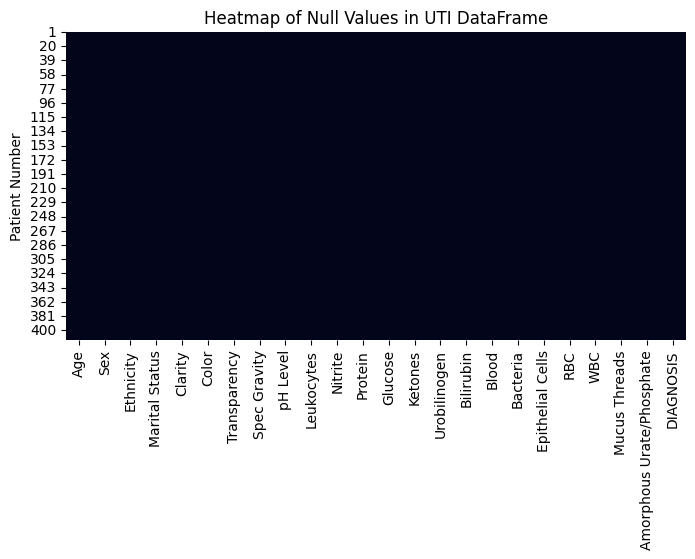

In [10]:
# Create a heatmap of the null values
plt.figure(figsize=(8, 4))
sns.heatmap(df_uti.isnull(), cbar=False)
plt.title('Heatmap of Null Values in UTI DataFrame')
plt.show()

> Minimal nulls with Amorphous Urate/Phospate only have 0.24% nulls\
> The data for the row with the missing amorphous urate was consulted to the clinic and was then fixed.

In [11]:
df_uti = df_uti.dropna()
df_uti.shape

(412, 24)

In [12]:
# Cleaning the Clarity column
df_uti['Clarity'] = df_uti['Clarity'].replace({ 'INCREASE': 'INCREASED', 'DECREASE': 'DECREASED' })

# Methodology:
1. [Fix data types ](#1) <br>
2. [Separate categorical and numerical columns](#2) <br>
3. [Correlation analysis](#3) <br>
    - Heatmap of Correlation Matrix (numeric features)
    - Point Biserial Correlation (binary variables correlated to continuous variables)
4. [Chi-Square Test for Categorical Variables](#4) <br>
5. [Principal Component Analysis (PCA)](#5) <br>
6. [Outlier Analysis](#6) <br>
7. [Univariate and Bivariate analysis](#7) <br>
- Scatter Plots: Plot scatter plots of paired features, such as pH Level vs. Spec Gravity, and color the points by Diagnosis to see patterns between feature pairs.
- Stacked Bar Charts or Grouped Bar Charts: For categorical features like Sex and Marital Status, use bar charts with counts for positive and negative diagnoses to see if these categories relate to UTI prevalence.

<a id="1"></a> <br>
## 1 : Fix Data Types

In [13]:
# Fixing data types in df_uti
df_uti['Age'] = df_uti['Age'].astype(int)
df_uti['Spec Gravity'] = df_uti['Spec Gravity'].astype(float)
df_uti['pH Level'] = df_uti['pH Level'].astype(float)

# Convert categorical columns to 'category' data type
categorical_columns = ['Sex', 'Ethnicity', 'Marital Status', 'Clarity', 'Color', 'Transparency', 'Leukocytes', 'Nitrite', 'Protein', 'Glucose', 'Ketones', 'Urobilinogen', 'Bilirubin', 'Blood', 'Bacteria', 'Epithelial Cells', 'RBC', 'WBC', 'Mucus Threads', 'Amorphous Urate/Phosphate', 'DIAGNOSIS']
for col in categorical_columns:
	df_uti[col] = df_uti[col].astype('object')

df_uti.dtypes

Age                            int32
Sex                           object
Ethnicity                     object
Marital Status                object
Clarity                       object
Color                         object
Transparency                  object
Spec Gravity                 float64
pH Level                     float64
Leukocytes                    object
Nitrite                       object
Protein                       object
Glucose                       object
Ketones                       object
Urobilinogen                  object
Bilirubin                     object
Blood                         object
Bacteria                      object
Epithelial Cells              object
RBC                           object
WBC                           object
Mucus Threads                 object
Amorphous Urate/Phosphate     object
DIAGNOSIS                     object
dtype: object

<a id="2"></a> <br>
## 2 : Separate Categorical and Numerical Columns

In [14]:
# Separate the categorical and numerical column
cat_col = [col for col in df_uti.columns if df_uti[col].dtype=='object']
num_col = [col for col in df_uti.columns if df_uti[col].dtype!='object']
print(cat_col)
print(num_col)

['Sex', 'Ethnicity', 'Marital Status', 'Clarity', 'Color', 'Transparency', 'Leukocytes', 'Nitrite', 'Protein', 'Glucose', 'Ketones', 'Urobilinogen', 'Bilirubin', 'Blood', 'Bacteria', 'Epithelial Cells', 'RBC', 'WBC', 'Mucus Threads', 'Amorphous Urate/Phosphate', 'DIAGNOSIS']
['Age', 'Spec Gravity', 'pH Level']


<a id="3"></a> <br>
## 3 : Correlation Analysis

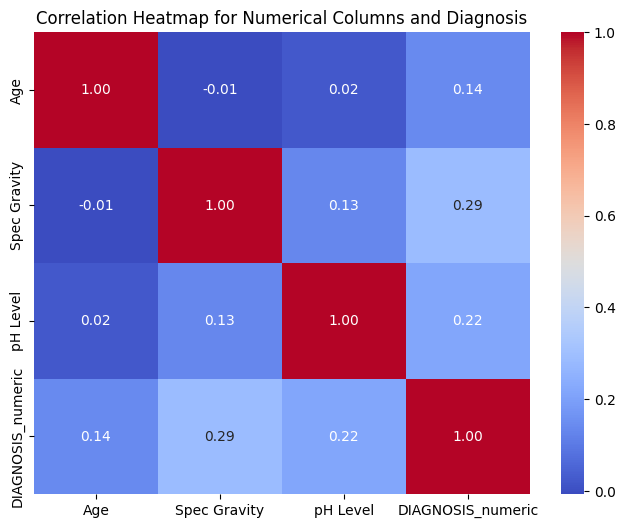

In [15]:
# Convert the 'DIAGNOSIS' column to numeric for correlation analysis
df_uti['DIAGNOSIS_numeric'] = df_uti['DIAGNOSIS'].apply(lambda x: 1 if x == 'UTI' else 0)

# Calculate the correlation matrix
correlation_matrix = df_uti[num_col + ['DIAGNOSIS_numeric']].corr()

# Plot the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap for Numerical Columns and Diagnosis')
plt.show()

> All of the numerical columns have a low correlation with the diagnosis with the closest one among them being Age.

In [16]:
# Calculate Point Biserial Correlation for numerical columns and DIAGNOSIS_numeric
point_biserial_results = {}
for col in num_col:
    correlation, p_value = pointbiserialr(df_uti[col], df_uti['DIAGNOSIS_numeric'])
    point_biserial_results[col] = {'correlation': correlation, 'p_value': p_value}

# Display results
for col, result in point_biserial_results.items():
    correlation = result['correlation']
    p_value = result['p_value']
    significance = 'Significant' if p_value <= 0.05 else 'Not Significant'
    print(f"Column: {col}, Correlation: {correlation}, p-value: {p_value}, Significance: {significance}")




Column: Age, Correlation: 0.1406332878463659, p-value: 0.004235099396928082, Significance: Significant
Column: Spec Gravity, Correlation: 0.2869615869334539, p-value: 2.988884568378475e-09, Significance: Significant
Column: pH Level, Correlation: 0.21655792030654522, p-value: 9.205994368695722e-06, Significance: Significant


> Despite the low correlation from as seen form the heatmap, using the biserial correlation test, these features are still proven to have a significance in determining the Diagnosis.

<a id="4"></a> <br>
## 4 : Chi-Square Test for Categorical Variables

In [17]:
# Check association between categorical variables and Diagnosis using Chi-square test
# Function to perform chi-square test
def chi_square_test(df, cat_cols, target_col):
    chi2_results = {}
    for col in cat_cols:
        if col != target_col:
            contingency_table = pd.crosstab(df[col], df[target_col])
            chi2, p, dof, ex = chi2_contingency(contingency_table)
            chi2_results[col] = p
    return chi2_results

# Perform chi-square test
chi2_results = chi_square_test(df_uti, cat_col, 'DIAGNOSIS')

# Display results
for col, p_value in chi2_results.items():
    print(f"Column: {col}, p-value: {p_value}")

Column: Sex, p-value: 0.05335355393602368
Column: Ethnicity, p-value: 0.9844863120770629
Column: Marital Status, p-value: 0.02010865441948301
Column: Clarity, p-value: 5.21616549666813e-05
Column: Color, p-value: 4.073874918693794e-05
Column: Transparency, p-value: 3.688754524934862e-21
Column: Leukocytes, p-value: 2.7665764693141555e-53
Column: Nitrite, p-value: 1.1228101013284366e-06
Column: Protein, p-value: 4.835163310235438e-07
Column: Glucose, p-value: 0.6195698026002812
Column: Ketones, p-value: 0.20146144207971917
Column: Urobilinogen, p-value: 0.36760135550726625
Column: Bilirubin, p-value: 0.5635023576791651
Column: Blood, p-value: 1.0606716765640154e-26
Column: Bacteria, p-value: 1.382137584459353e-54
Column: Epithelial Cells, p-value: 3.4656198789614215e-28
Column: RBC, p-value: 1.0416425120042373e-26
Column: WBC, p-value: 5.7555614288817956e-52
Column: Mucus Threads, p-value: 1.0612838641881522e-20
Column: Amorphous Urate/Phosphate, p-value: 1.233796165552164e-52


In [18]:
# Check association between categorical variables and Diagnosis using Chi-square test
# Function to perform chi-square test
def chi_square_test(df, cat_cols, target_col):
    chi2_results = {}
    for col in cat_cols:
        if col != target_col:
            contingency_table = pd.crosstab(df[col], df[target_col])
            chi2, p, dof, ex = chi2_contingency(contingency_table)
            chi2_results[col] = {'chi2': chi2, 'p_value': p, 'dof': dof}
    return chi2_results

# Perform chi-square test
chi2_results = chi_square_test(df_uti, cat_col, 'DIAGNOSIS')

# Display results
for col, result in chi2_results.items():
    chi2_stat = result['chi2']
    p_value = result['p_value']
    dof = result['dof']
    significance = 'Significant' if p_value <= 0.05 else 'Not Significant'
    print(f"Column: {col}, Chi2: {chi2_stat}, p-value: {p_value}, dof: {dof}, Significance: {significance}")

Column: Sex, Chi2: 3.732810341856876, p-value: 0.05335355393602368, dof: 1, Significance: Not Significant
Column: Ethnicity, Chi2: 0.0003780982894952702, p-value: 0.9844863120770629, dof: 1, Significance: Not Significant
Column: Marital Status, Chi2: 7.813209976902967, p-value: 0.02010865441948301, dof: 2, Significance: Significant
Column: Clarity, Chi2: 16.367882891469655, p-value: 5.21616549666813e-05, dof: 1, Significance: Significant
Column: Color, Chi2: 33.99339170954133, p-value: 4.073874918693794e-05, dof: 8, Significance: Significant
Column: Transparency, Chi2: 105.48140042575685, p-value: 3.688754524934862e-21, dof: 5, Significance: Significant
Column: Leukocytes, Chi2: 251.7250063043122, p-value: 2.7665764693141555e-53, dof: 4, Significance: Significant
Column: Nitrite, Chi2: 30.425823304400613, p-value: 1.1228101013284366e-06, dof: 3, Significance: Significant
Column: Protein, Chi2: 37.46358458938349, p-value: 4.835163310235438e-07, dof: 5, Significance: Significant
Column: 

In [19]:
# Separate significant and not significant results
significant_results = {col: result for col, result in chi2_results.items() if result['p_value'] <= 0.05}
not_significant_results = {col: result for col, result in chi2_results.items() if result['p_value'] > 0.05}

# Display significant results
print("Significant Results:")
for col, result in significant_results.items():
    print(f"Column: {col}, Chi2: {result['chi2']}, p-value: {result['p_value']}, dof: {result['dof']}")

# Display not significant results
print("\nNot Significant Results:")
for col, result in not_significant_results.items():
    print(f"Column: {col}, Chi2: {result['chi2']}, p-value: {result['p_value']}, dof: {result['dof']}")

Significant Results:
Column: Marital Status, Chi2: 7.813209976902967, p-value: 0.02010865441948301, dof: 2
Column: Clarity, Chi2: 16.367882891469655, p-value: 5.21616549666813e-05, dof: 1
Column: Color, Chi2: 33.99339170954133, p-value: 4.073874918693794e-05, dof: 8
Column: Transparency, Chi2: 105.48140042575685, p-value: 3.688754524934862e-21, dof: 5
Column: Leukocytes, Chi2: 251.7250063043122, p-value: 2.7665764693141555e-53, dof: 4
Column: Nitrite, Chi2: 30.425823304400613, p-value: 1.1228101013284366e-06, dof: 3
Column: Protein, Chi2: 37.46358458938349, p-value: 4.835163310235438e-07, dof: 5
Column: Blood, Chi2: 127.96485386341524, p-value: 1.0606716765640154e-26, dof: 4
Column: Bacteria, Chi2: 257.765189342343, p-value: 1.382137584459353e-54, dof: 4
Column: Epithelial Cells, Chi2: 138.649130908507, p-value: 3.4656198789614215e-28, dof: 5
Column: RBC, Chi2: 131.69077542830917, p-value: 1.0416425120042373e-26, dof: 5
Column: WBC, Chi2: 257.9025905389386, p-value: 5.7555614288817956e

C:\Users\k3n\AppData\Local\Temp\ipykernel_19792\4117547222.py:14: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.



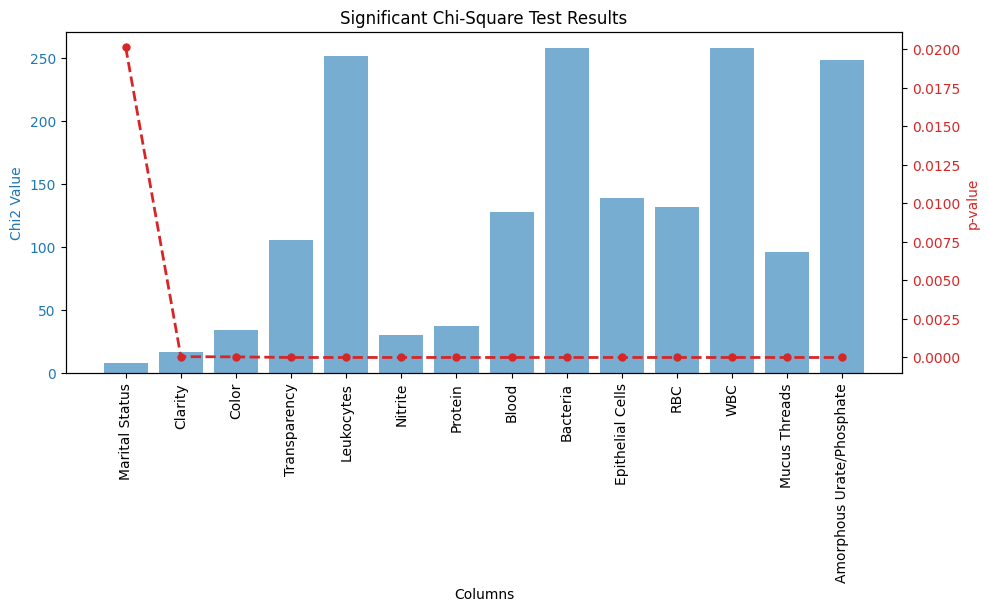

C:\Users\k3n\AppData\Local\Temp\ipykernel_19792\4117547222.py:14: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.



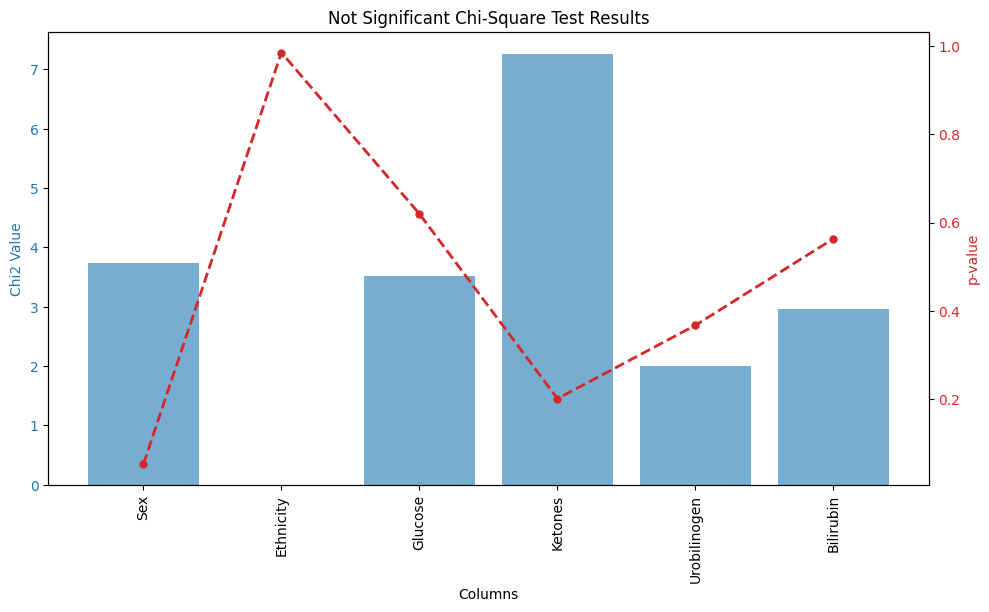

In [20]:
# Function to plot chi-square test results
def plot_chi_square_results(results, title):
    columns = list(results.keys())
    chi2_values = [results[col]['chi2'] for col in columns]
    p_values = [results[col]['p_value'] for col in columns]

    fig, ax1 = plt.subplots(figsize=(10, 6))

    color = 'tab:blue'
    ax1.set_xlabel('Columns')
    ax1.set_ylabel('Chi2 Value', color=color)
    ax1.bar(columns, chi2_values, color=color, alpha=0.6, label='Chi2 Value')
    ax1.tick_params(axis='y', labelcolor=color)
    ax1.set_xticklabels(columns, rotation=90)

    ax2 = ax1.twinx()
    color = 'tab:red'
    ax2.set_ylabel('p-value', color=color)
    ax2.plot(columns, p_values, color=color, marker='o', linestyle='dashed', linewidth=2, markersize=5, label='p-value')
    ax2.tick_params(axis='y', labelcolor=color)

    fig.tight_layout()
    plt.title(title)
    plt.show()

# Plot significant results
plot_chi_square_results(significant_results, 'Significant Chi-Square Test Results')

# Plot not significant results
plot_chi_square_results(not_significant_results, 'Not Significant Chi-Square Test Results')

> The Categorical columns that show significant results in the chi-square tests (< 0.05 p-value) means that those features are significantly associated with the diagnosis. Those parameters show a strong relationship between that parameter and whether the diagnosis is positive or negative for UTI.

<a id="5"></a> <br>
## 5 : Principal Component Analysis (PCA)

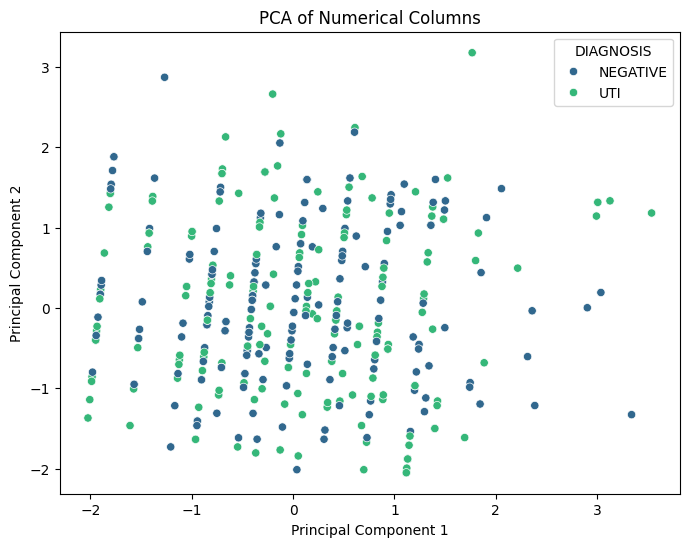

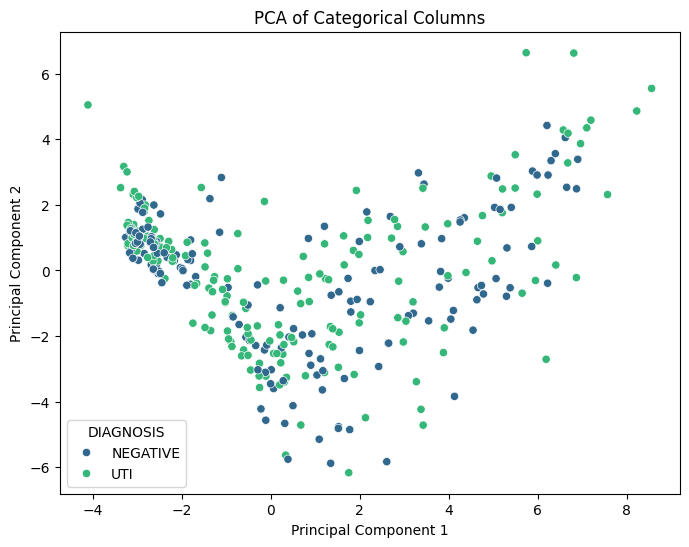

In [21]:
# Standardize the numerical columns
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df_uti[num_col])

# Perform PCA
pca = PCA(n_components=2)  # Reduce to 2 components for visualization
principal_components = pca.fit_transform(scaled_data)

# Create a DataFrame with the principal components
pca_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])
pca_df['DIAGNOSIS'] = df_uti['DIAGNOSIS']

# Plot the PCA results
plt.figure(figsize=(8, 6))
sns.scatterplot(x='PC1', y='PC2', hue='DIAGNOSIS', data=pca_df, palette='viridis')
plt.title('PCA of Numerical Columns')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()
# Encode categorical columns using one-hot encoding
df_uti_encoded = pd.get_dummies(df_uti[cat_col], drop_first=True)

# Standardize the encoded categorical data
scaled_cat_data = scaler.fit_transform(df_uti_encoded)

# Perform PCA on the encoded categorical data
pca_cat = PCA(n_components=2)
principal_components_cat = pca_cat.fit_transform(scaled_cat_data)

# Create a DataFrame with the principal components for categorical data
pca_cat_df = pd.DataFrame(data=principal_components_cat, columns=['PC1', 'PC2'])
pca_cat_df['DIAGNOSIS'] = df_uti['DIAGNOSIS']

# Plot the PCA results for categorical data
plt.figure(figsize=(8, 6))
sns.scatterplot(x='PC1', y='PC2', hue='DIAGNOSIS', data=pca_cat_df, palette='viridis')
plt.title('PCA of Categorical Columns')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

> The results from PCA means that the current raw data needs more data transformations and feature engineering 

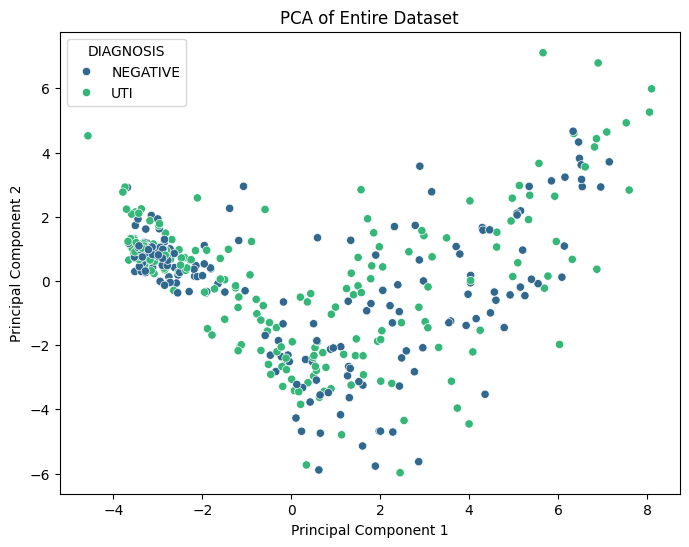

In [22]:
# Encode categorical columns using one-hot encoding
df_uti_encoded = pd.get_dummies(df_uti, drop_first=True)

# Standardize the entire dataset
scaled_data = scaler.fit_transform(df_uti_encoded)

# Perform PCA on the entire dataset
pca = PCA(n_components=2)
principal_components = pca.fit_transform(scaled_data)

# Create a DataFrame with the principal components
pca_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])
pca_df['DIAGNOSIS'] = df_uti['DIAGNOSIS']

# Plot the PCA results for the entire dataset
plt.figure(figsize=(8, 6))
sns.scatterplot(x='PC1', y='PC2', hue='DIAGNOSIS', data=pca_df, palette='viridis')
plt.title('PCA of Entire Dataset')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

> The PCA plot suggests some degree of association but no strong, distinct separation between UTI and NEGATIVE cases based on the current state of the features.\
> Consider exploring other features or using a supervised learning approach to assess which features (or combinations) are more predictive of the UTI diagnosis.

<a id="6"></a> <br>
## 6 : Outlier Analysis

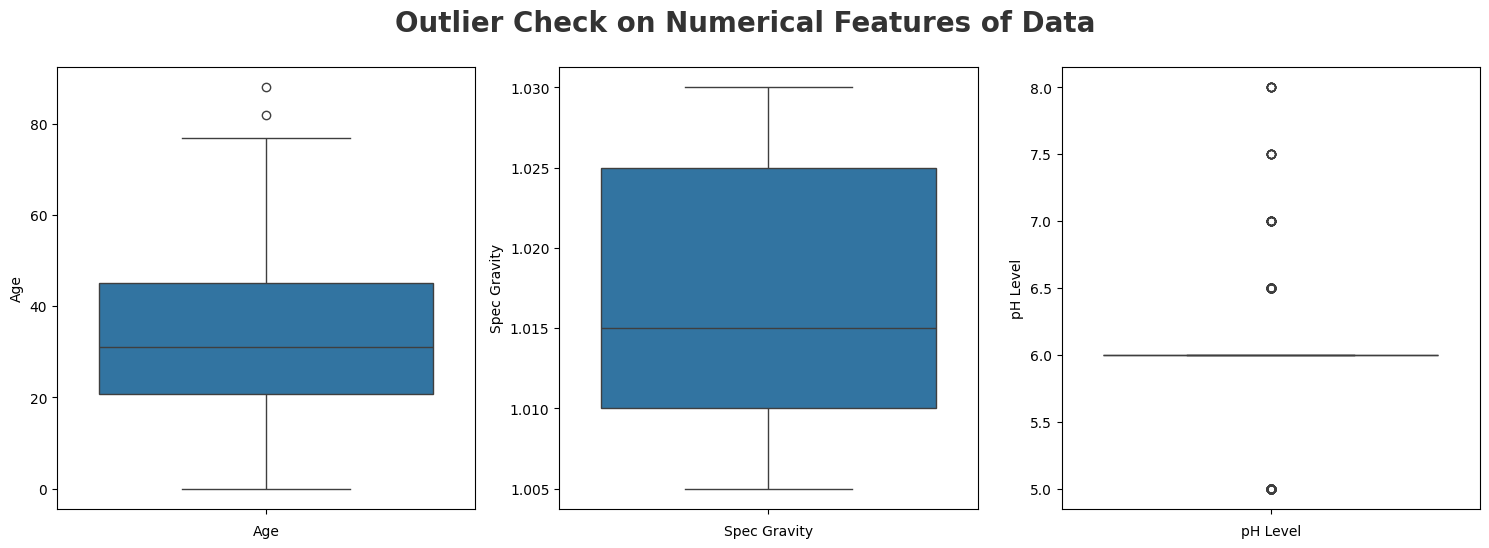

In [23]:
# Outlier check
plt.figure(figsize=(15, 10))
plt.suptitle('Outlier Check on Numerical Features of Data', fontsize=20, fontweight='bold', alpha=0.8, y=1.)

for i in range(0, len(num_col)):
    plt.subplot(2, 3, i+1)
    sns.boxplot(df_uti[num_col[i]])
    plt.xlabel(num_col[i])
    plt.tight_layout()

> Age and PH Level have few outliers. Also, see that pH level has a very squashed boxplot which may need more analysis

### Investigate pH Level

In [24]:
# Interquartile Range
pH_Q1 = df_uti["pH Level"].quantile(0.25)
pH_Q3 = df_uti["pH Level"].quantile(0.75)


pH_IQR = pH_Q3 - pH_Q1
pH_outliers = df_uti[(df_uti["pH Level"] > (pH_Q3 + 1.5 * pH_IQR)) | 
                     (df_uti["pH Level"] < (pH_Q1 - 1.5 * pH_IQR))].copy()

In [25]:
non_outliers_pH = df_uti[(~df_uti.index.isin(pH_outliers.index))]
non_outliers_pH

,Age,Sex,Ethnicity,Marital Status,Clarity,Color,Transparency,Spec Gravity,pH Level,Leukocytes,...,Bilirubin,Blood,Bacteria,Epithelial Cells,RBC,WBC,Mucus Threads,Amorphous Urate/Phosphate,DIAGNOSIS,DIAGNOSIS_numeric
Patient Number,,,,,,,,,,,,,,,,,,,,,
2,44,FEMALE,FILIPINO,MARRIED,DECREASED,YELLOW,CLOUDY,1.020,6.0,NEGATIVE,...,NEGATIVE,2+,FEW,MANY,20-30,0-2,MANY,RARE,NEGATIVE,0
3,22,FEMALE,FILIPINO,SINGLE,DECREASED,DARK YELLOW,HAZY,1.025,6.0,NEGATIVE,...,NEGATIVE,NEGATIVE,MODERATE,MODERATE,0-2,0-2,FEW,FEW,NEGATIVE,0
13,51,FEMALE,FILIPINO,MARRIED,DECREASED,YELLOW,HAZY,1.020,6.0,NEGATIVE,...,NEGATIVE,NEGATIVE,FEW,MODERATE,0-2,0-2,FEW,RARE,NEGATIVE,0
22,36,MALE,FILIPINO,MARRIED,INCREASED,YELLOW,CLEAR,1.010,6.0,NEGATIVE,...,NEGATIVE,NEGATIVE,RARE,FEW,0-2,0-2,FEW,RARE,NEGATIVE,0
23,41,FEMALE,FILIPINO,MARRIED,DECREASED,YELLOW,CLOUDY,1.025,6.0,1+,...,NEGATIVE,NEGATIVE,MANY,MANY,0-2,05-Oct,FEW,MANY,UTI,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
408,24,FEMALE,FILIPINO,SINGLE,DECREASED,LIGHT YELLOW,HAZY,1.010,6.0,NEGATIVE,...,NEGATIVE,NEGATIVE,RARE,FEW,0-2,0-2,FEW,RARE,NEGATIVE,0
409,46,FEMALE,FILIPINO,MARRIED,DECREASED,LIGHT YELLOW,HAZY,1.015,6.0,NEGATIVE,...,NEGATIVE,NEGATIVE,RARE,FEW,0-2,0-2,FEW,RARE,NEGATIVE,0
410,33,FEMALE,FILIPINO,MARRIED,DECREASED,LIGHT YELLOW,HAZY,1.025,6.0,NEGATIVE,...,NEGATIVE,NEGATIVE,RARE,FEW,0-2,0-2,MODERATE,RARE,NEGATIVE,0


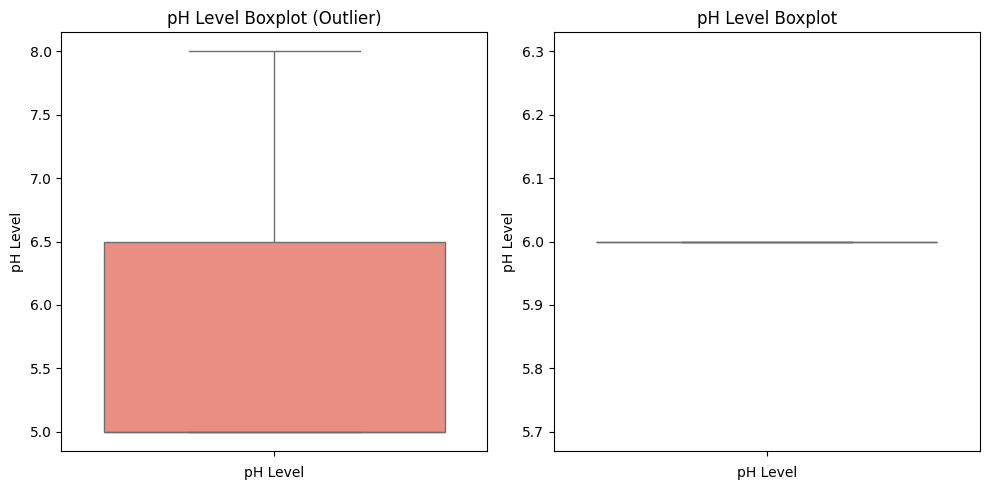

In [26]:
# Show boxplot for pH Level with and without outliers
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
sns.boxplot(data=pH_outliers["pH Level"], color='salmon')
plt.title('pH Level Boxplot (Outlier)')
plt.xlabel('pH Level')

plt.subplot(1, 2, 2)
sns.boxplot(data=non_outliers_pH["pH Level"], color='salmon')
plt.title('pH Level Boxplot')
plt.xlabel('pH Level')

plt.tight_layout()
plt.show()

> From the boxplots, those from the outliers have a healthy boxplot with distribution of data ranging from 5 to 6.5 while for the one on the right with outliers removed, it has a squished boxplot with only points to 6. This would mean that majority of the data have a pH level of 6. This would also mean that the outliers has a significant meaning and should not be disregarded in this sense since it still contributes to the diagnosis.

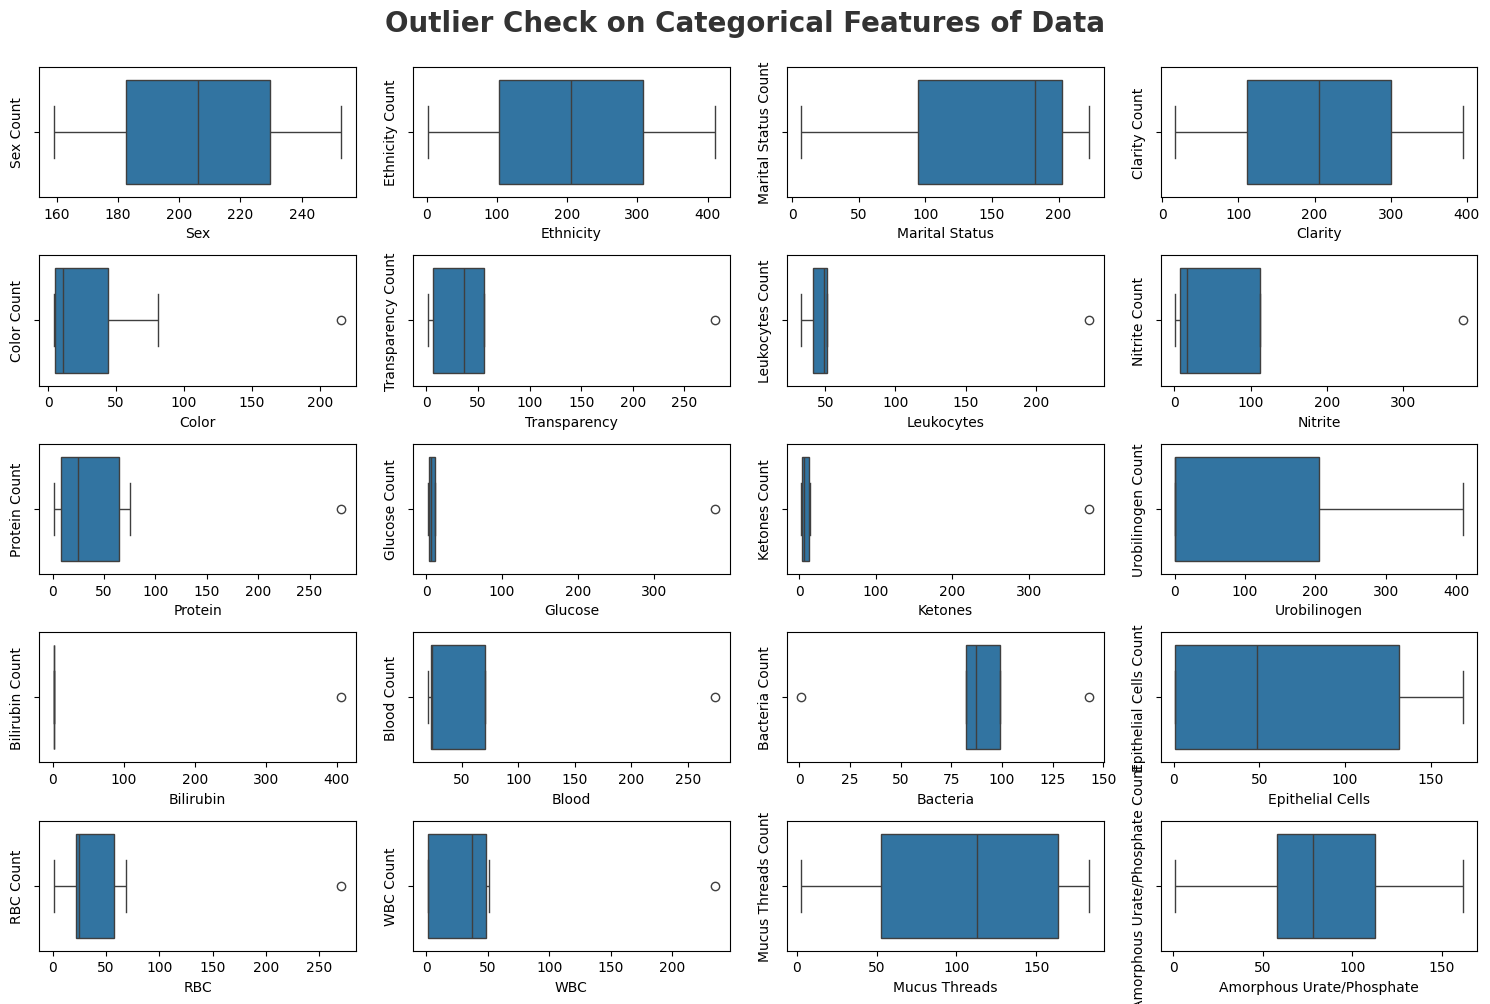

In [27]:
# Outlier check for categorical columns without comparing with 'DIAGNOSIS'
cat_col_excluding_diagnosis = [col for col in cat_col if col != 'DIAGNOSIS']

# Show boxplot for categorical columns without comparing with 'DIAGNOSIS'
plt.figure(figsize=(15, 10))
plt.suptitle('Outlier Check on Categorical Features of Data', fontsize=20, fontweight='bold', alpha=0.8, y=1.)

for i in range(0, len(cat_col_excluding_diagnosis)):
    plt.subplot(5, 4, i+1)
    sns.boxplot(x=df_uti[cat_col_excluding_diagnosis[i]].value_counts().values)
    plt.xlabel(cat_col_excluding_diagnosis[i])
    label = str(cat_col_excluding_diagnosis[i]) + ' Count'
    plt.ylabel(label)
    plt.tight_layout()

plt.show()

> The categorical features does not seem to have any major outliers which should be taken into account 

<a id="7"></a> <br>
## 7 : Variate Analysis

### Univariate Analysis

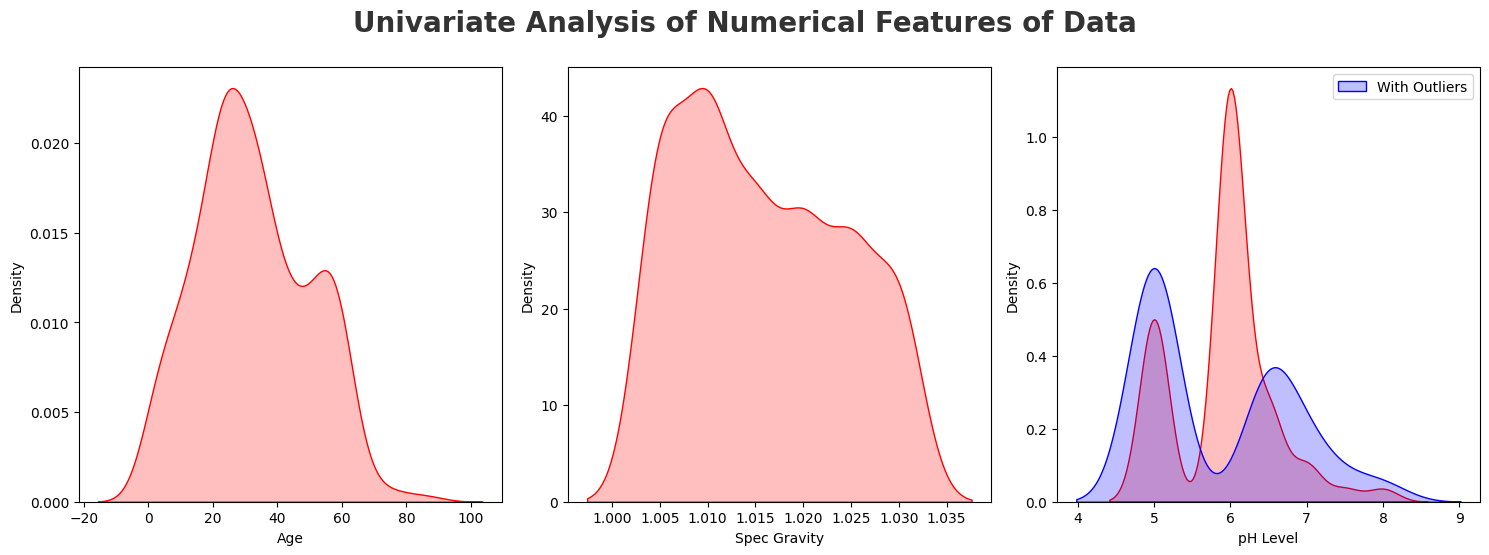

In [28]:
# Proportion of data distribution for numerical data
plt.figure(figsize=(15, 10))
plt.suptitle('Univariate Analysis of Numerical Features of Data', fontsize=20, fontweight='bold', alpha=0.8, y=1.)

for i in range(0, len(num_col)):
    plt.subplot(2, 3, i+1)
    sns.kdeplot(x=df_uti[num_col[i]], fill=True, color='r', warn_singular=False)
    if num_col[i] == 'pH Level':
        sns.kdeplot(x=pH_outliers['pH Level'], fill=True, color='b', label='With Outliers', warn_singular=False)
        sns.kdeplot(x=non_outliers_pH['pH Level'], fill=True, color='g', label='Without Outliers', warn_singular=False)
        plt.legend()
    plt.xlabel(num_col[i])

plt.tight_layout()
plt.show()

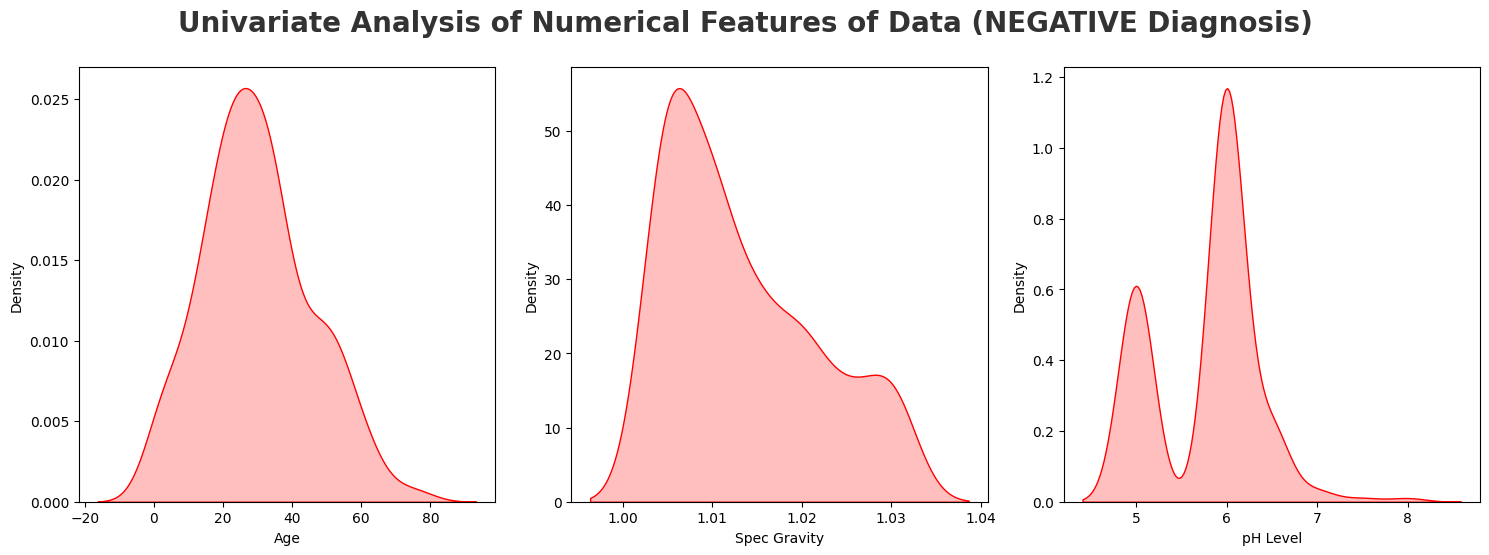

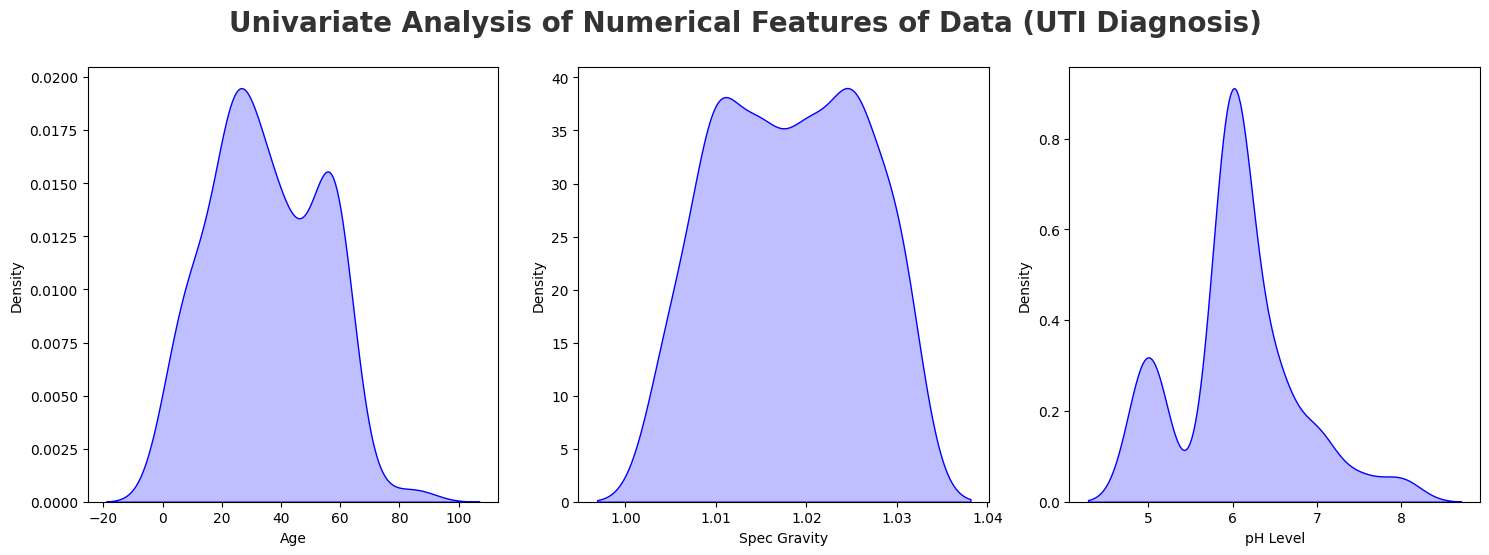

In [29]:
# Proportion of data distribution for numerical data for 'NEGATIVE' diagnosis
plt.figure(figsize=(15, 10))
plt.suptitle('Univariate Analysis of Numerical Features of Data (NEGATIVE Diagnosis)', fontsize=20, fontweight='bold', alpha=0.8, y=1.)

for i in range(0, len(num_col)):
    plt.subplot(2, 3, i+1)
    sns.kdeplot(x=df_uti[df_uti['DIAGNOSIS'] == 'NEGATIVE'][num_col[i]], fill=True, color='r', warn_singular=False)
    plt.xlabel(num_col[i])

plt.tight_layout()
plt.show()

# Proportion of data distribution for numerical data for 'UTI' diagnosis
plt.figure(figsize=(15, 10))
plt.suptitle('Univariate Analysis of Numerical Features of Data (UTI Diagnosis)', fontsize=20, fontweight='bold', alpha=0.8, y=1.)

for i in range(0, len(num_col)):
    plt.subplot(2, 3, i+1)
    sns.kdeplot(x=df_uti[df_uti['DIAGNOSIS'] == 'UTI'][num_col[i]], fill=True, color='b', warn_singular=False)
    plt.xlabel(num_col[i])

plt.tight_layout()
plt.show()

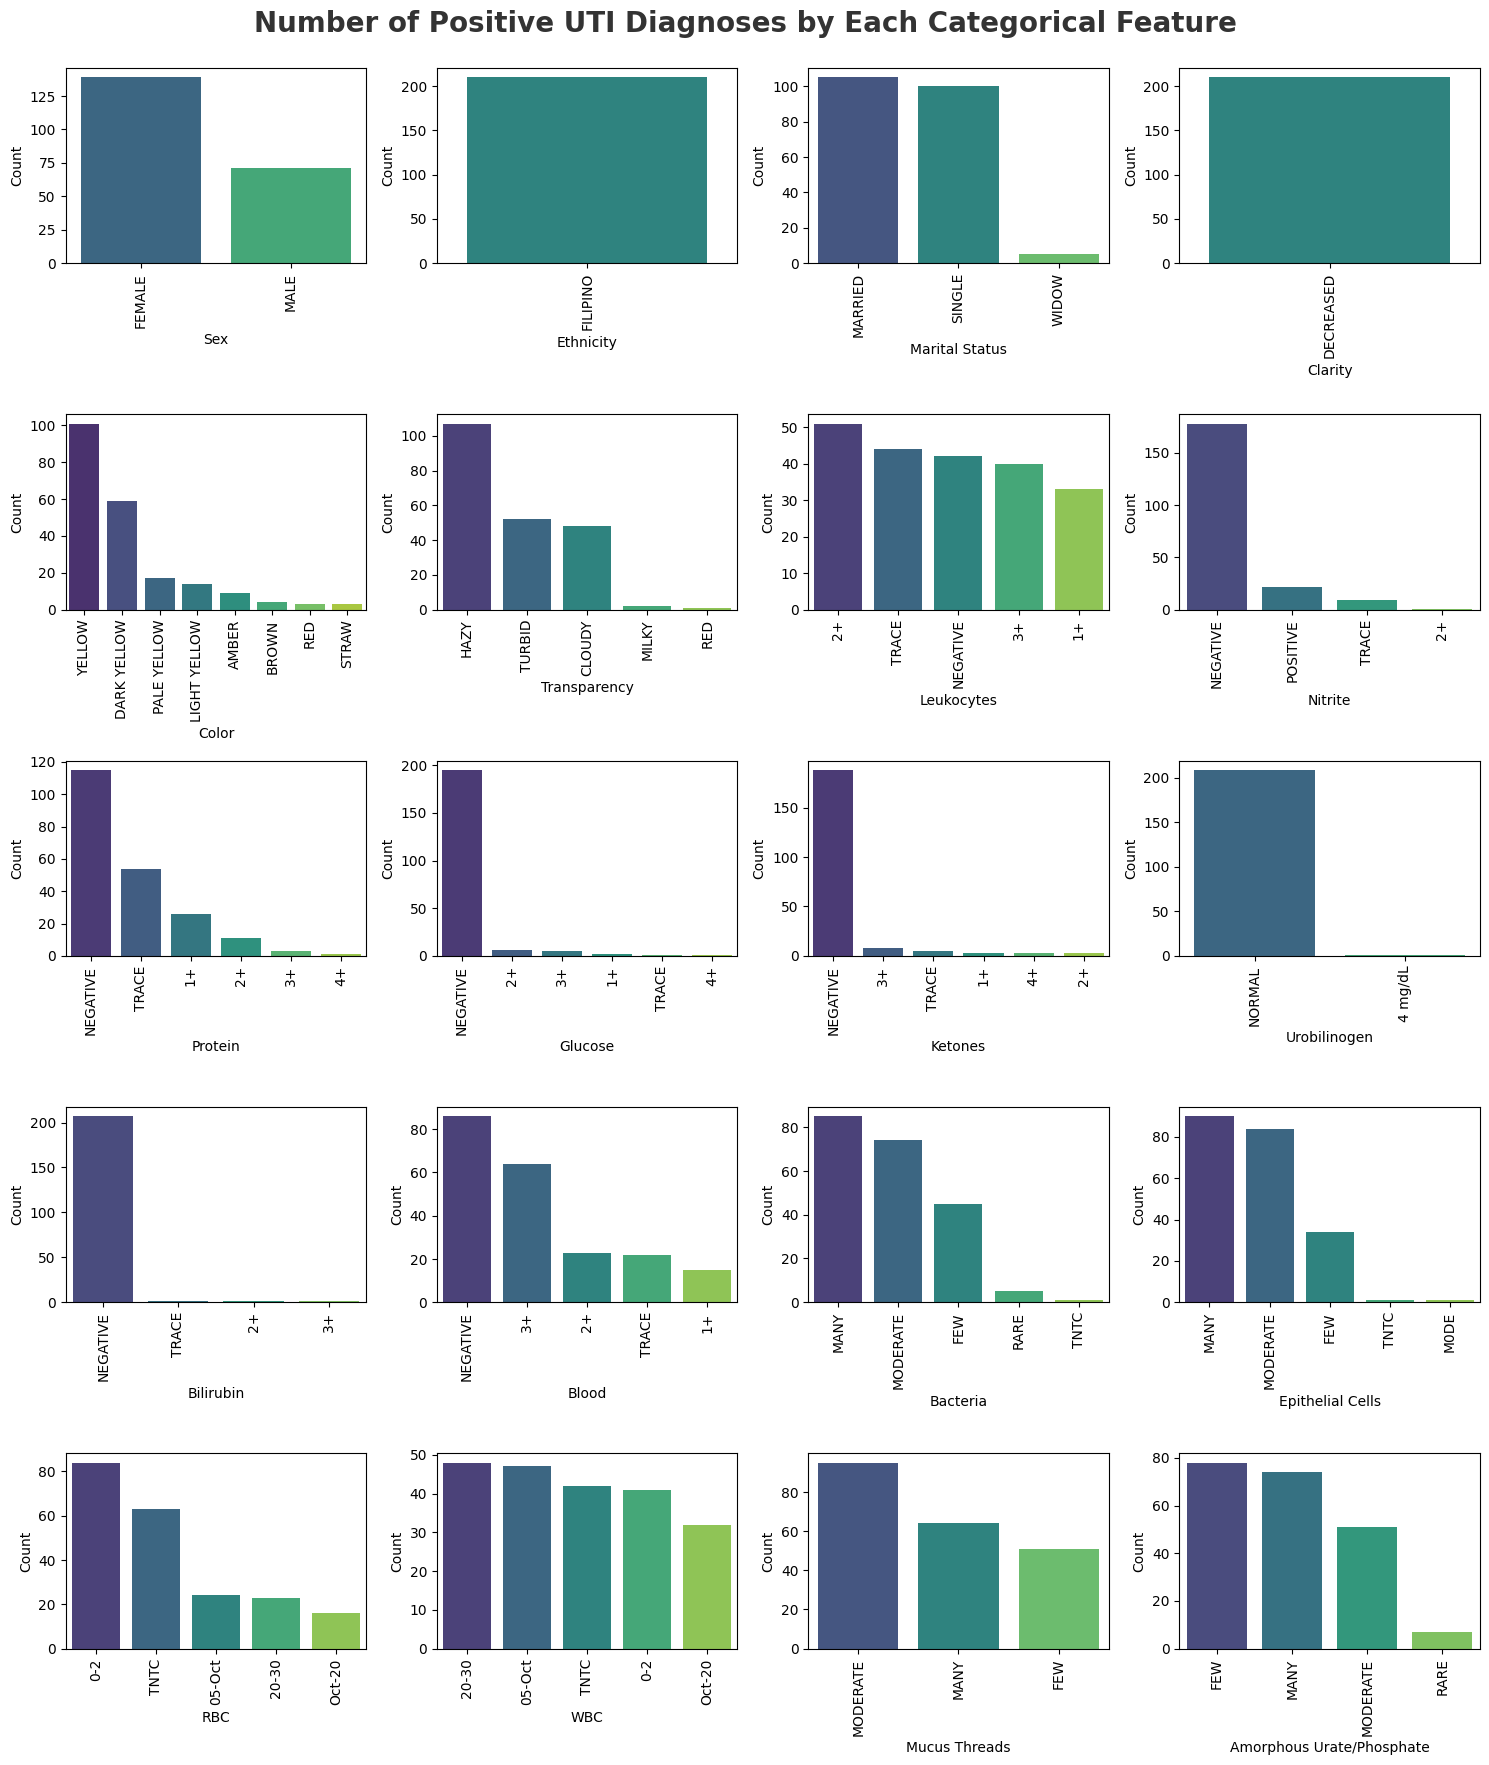

In [30]:
plt.figure(figsize=(15, 20))
plt.suptitle('Number of Positive UTI Diagnoses by Each Categorical Feature', fontsize=20, fontweight='bold', alpha=0.8, y=1.)

for i, col in enumerate(cat_col_excluding_diagnosis):
    plt.subplot(6, 4, i+1)
    temp_df = df_uti[df_uti['DIAGNOSIS'] == 'UTI'][col].value_counts()
    sns.barplot(x=temp_df.index, y=temp_df.values, palette='viridis', hue=temp_df.index)
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.xticks(rotation=90)
    plt.tight_layout()

plt.show()

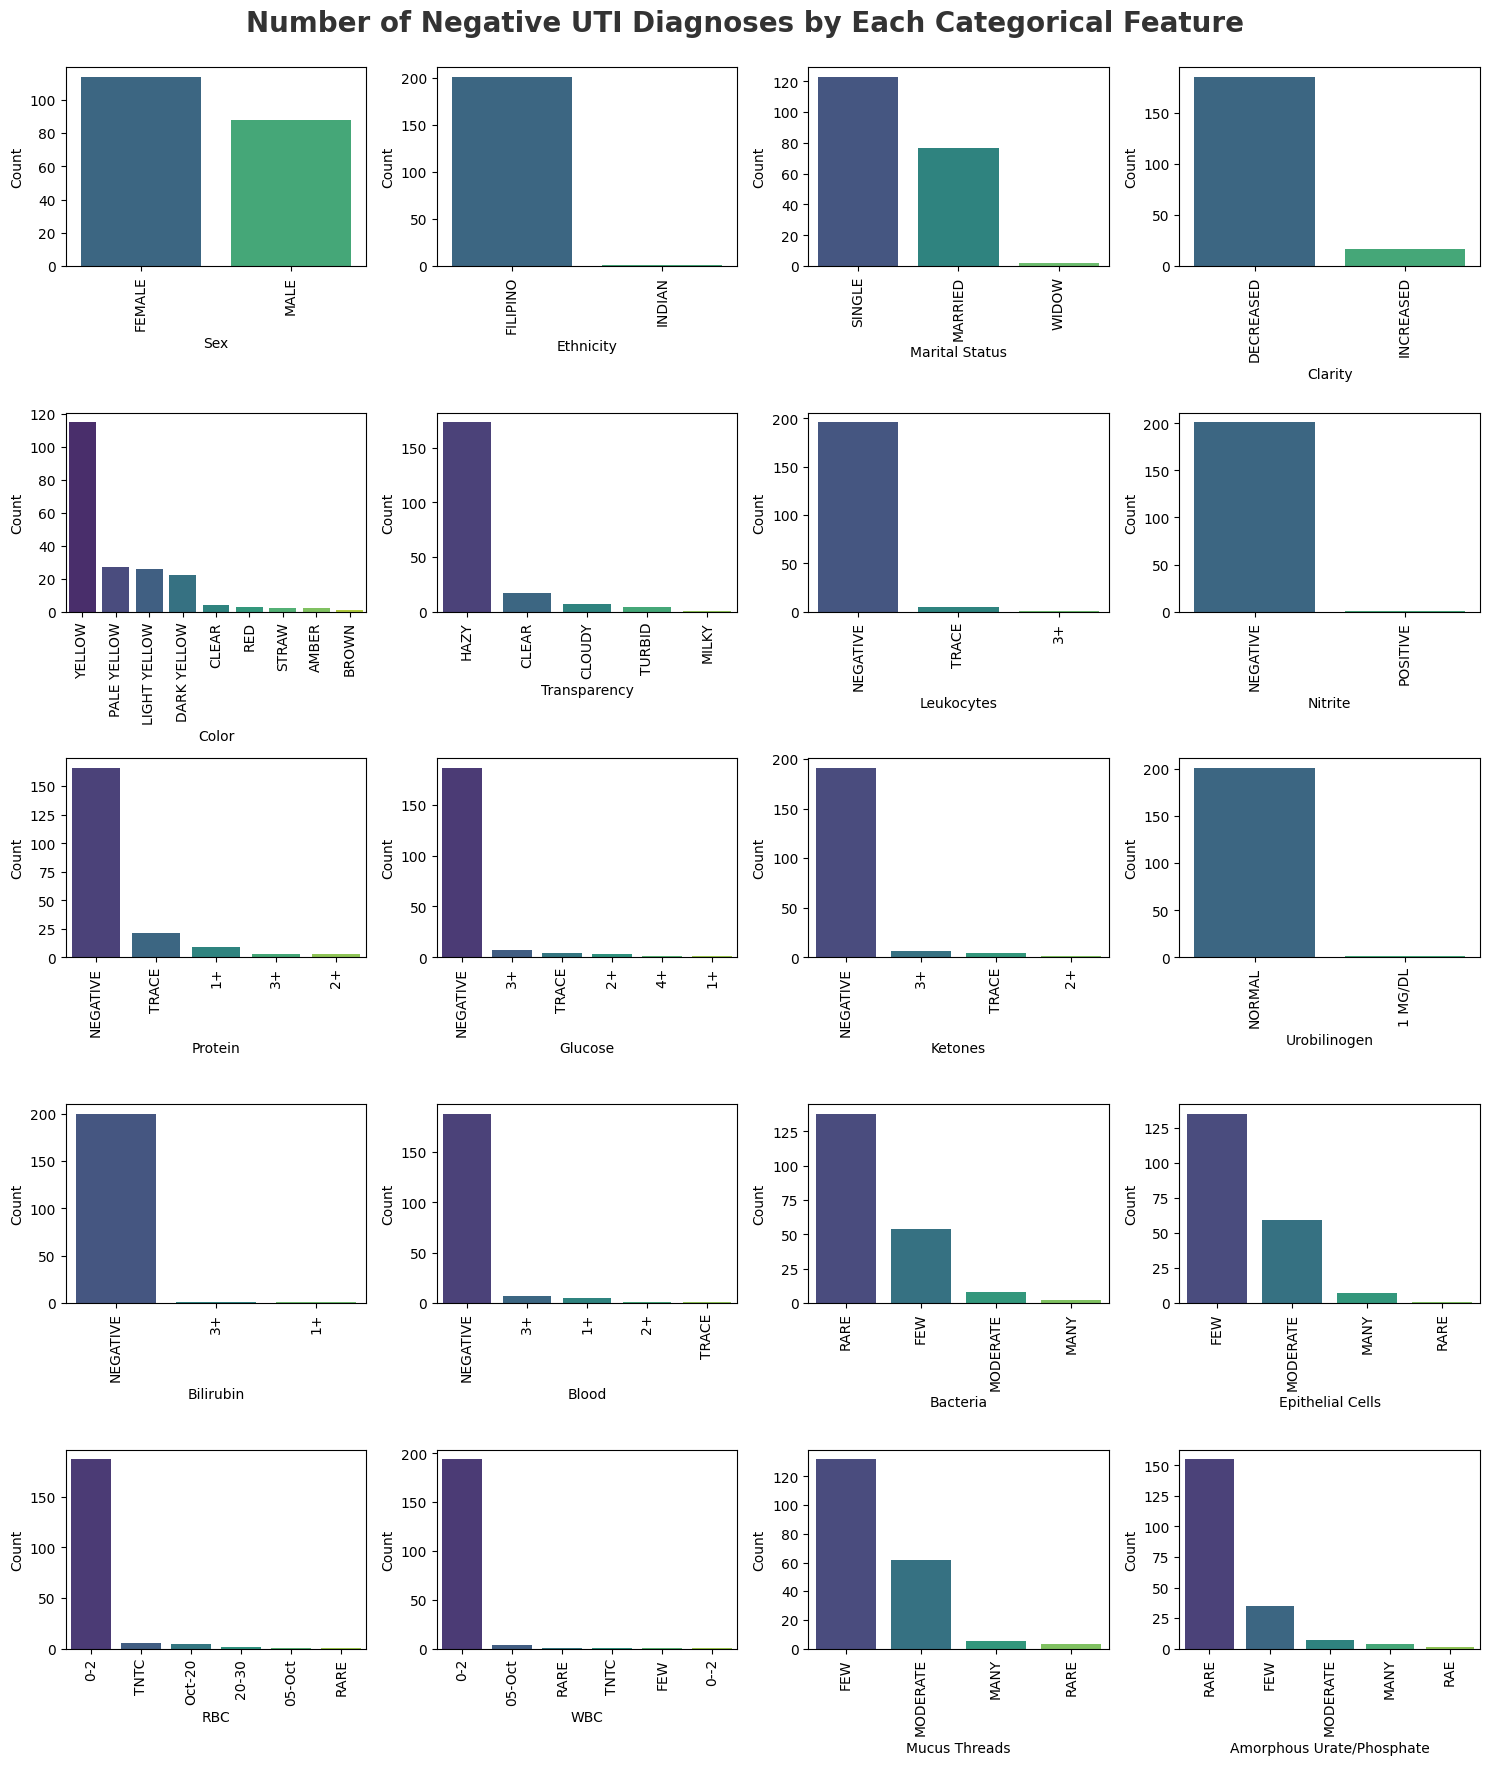

In [31]:
# Categorical columns excluding 'DIAGNOSIS'
cat_col_excluding_diagnosis = [col for col in cat_col if col != 'DIAGNOSIS']

plt.figure(figsize=(15, 20))
plt.suptitle('Number of Negative UTI Diagnoses by Each Categorical Feature', fontsize=20, fontweight='bold', alpha=0.8, y=1.)

for i, col in enumerate(cat_col_excluding_diagnosis):
    plt.subplot(6, 4, i+1)
    temp_df = df_uti[df_uti['DIAGNOSIS'] == 'NEGATIVE'][col].value_counts()
    sns.barplot(x=temp_df.index, y=temp_df.values, palette='viridis', hue=temp_df.index)
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.xticks(rotation=90)
    plt.tight_layout()

plt.show()

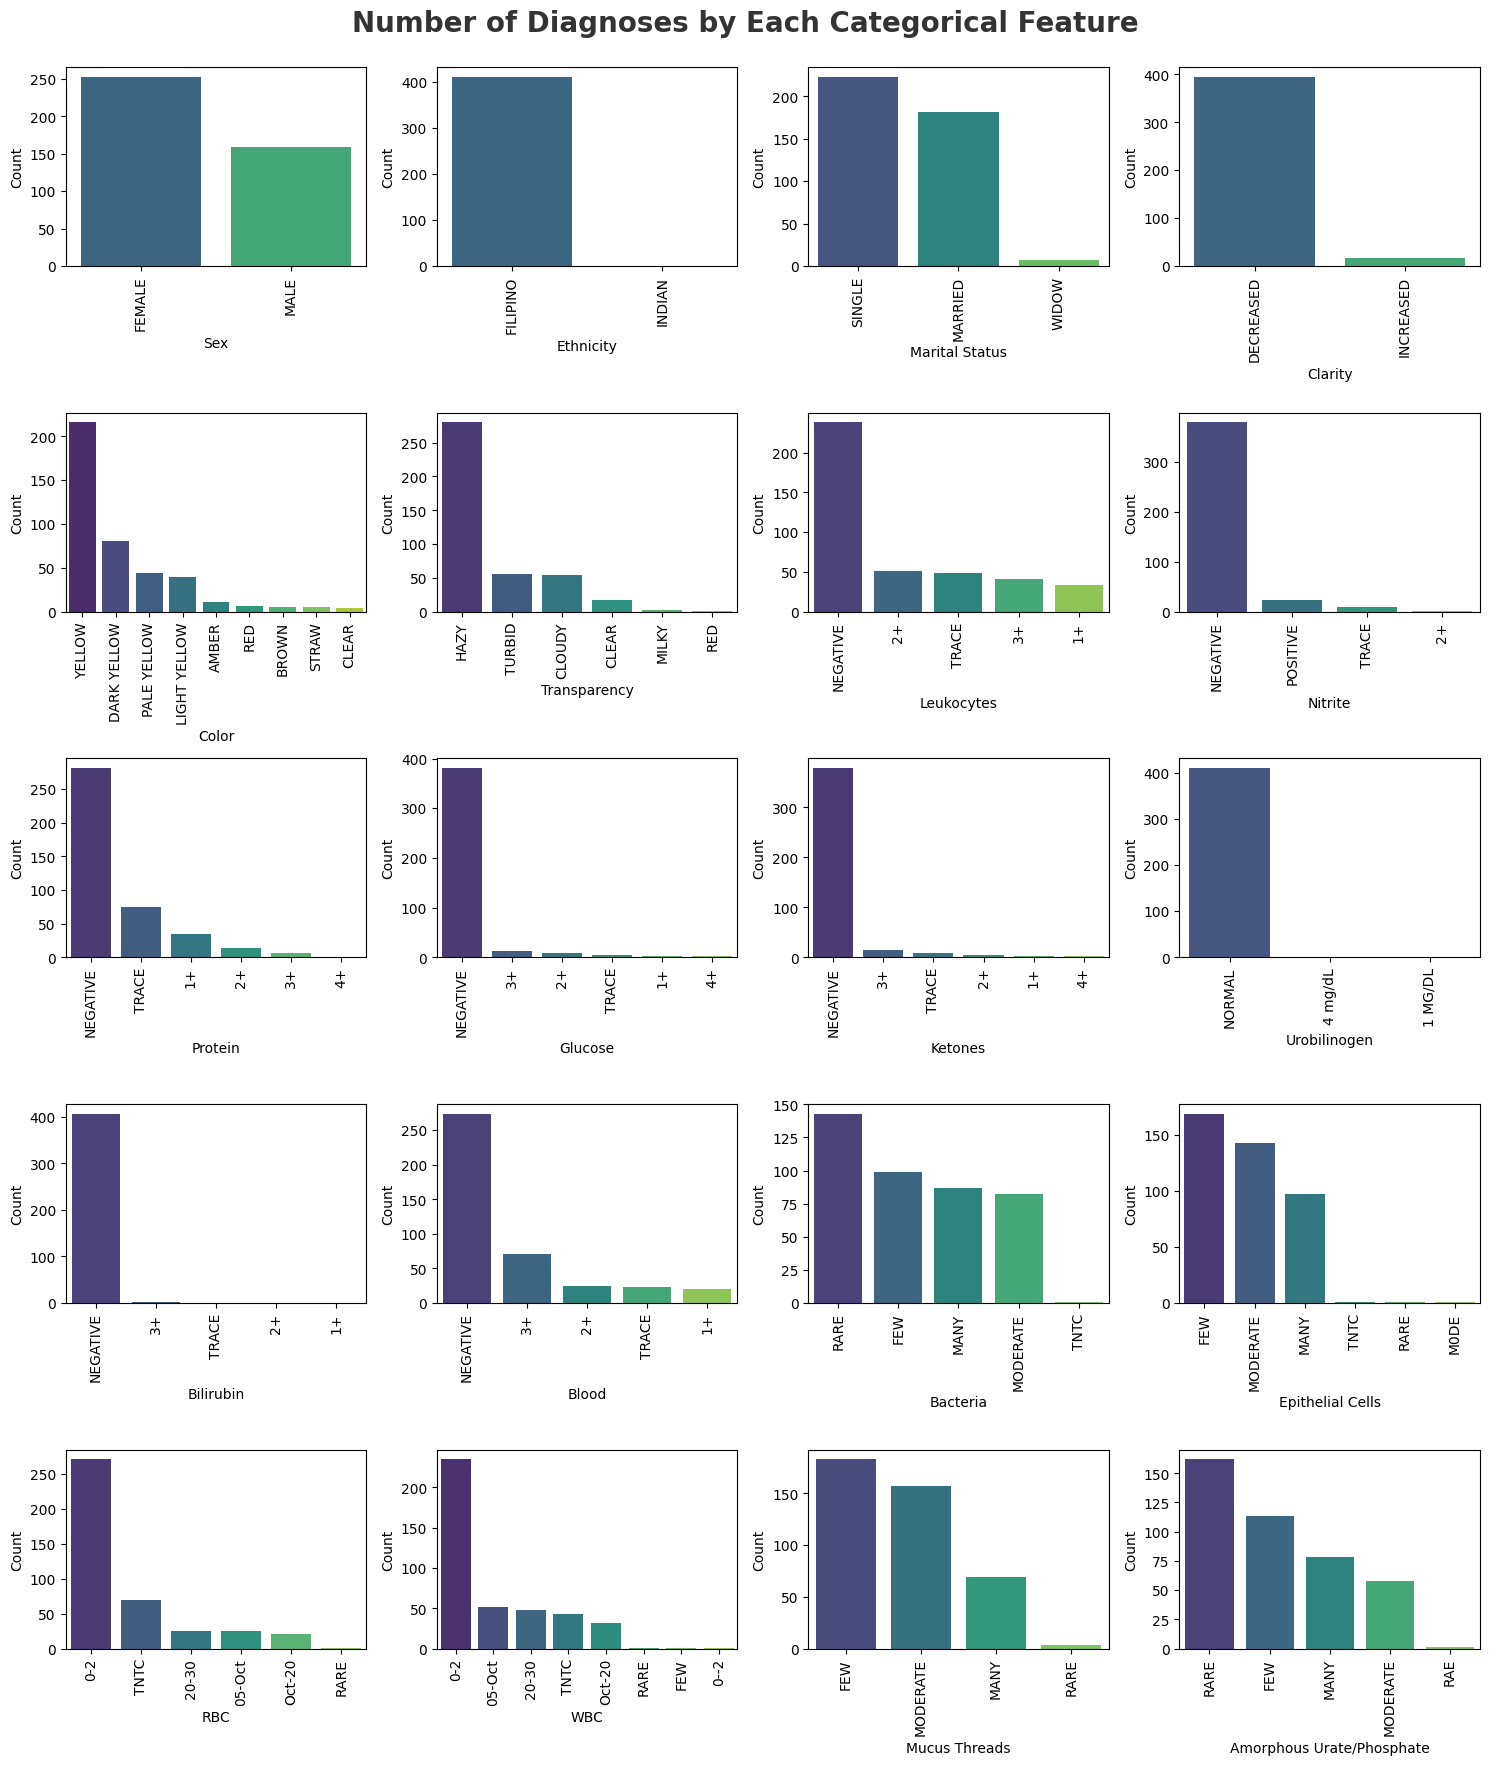

In [32]:
plt.figure(figsize=(15, 20))
plt.suptitle('Number of Diagnoses by Each Categorical Feature', fontsize=20, fontweight='bold', alpha=0.8, y=1.)

for i, col in enumerate(cat_col_excluding_diagnosis):
    plt.subplot(6, 4, i+1)
    temp_df = df_uti[col].value_counts()
    sns.barplot(x=temp_df.index, y=temp_df.values, palette='viridis', hue=temp_df.index)
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.xticks(rotation=90)
    plt.tight_layout()

plt.show()

### Bivariate Analysis

In [33]:
cat_col

['Sex',
 'Ethnicity',
 'Marital Status',
 'Clarity',
 'Color',
 'Transparency',
 'Leukocytes',
 'Nitrite',
 'Protein',
 'Glucose',
 'Ketones',
 'Urobilinogen',
 'Bilirubin',
 'Blood',
 'Bacteria',
 'Epithelial Cells',
 'RBC',
 'WBC',
 'Mucus Threads',
 'Amorphous Urate/Phosphate',
 'DIAGNOSIS']

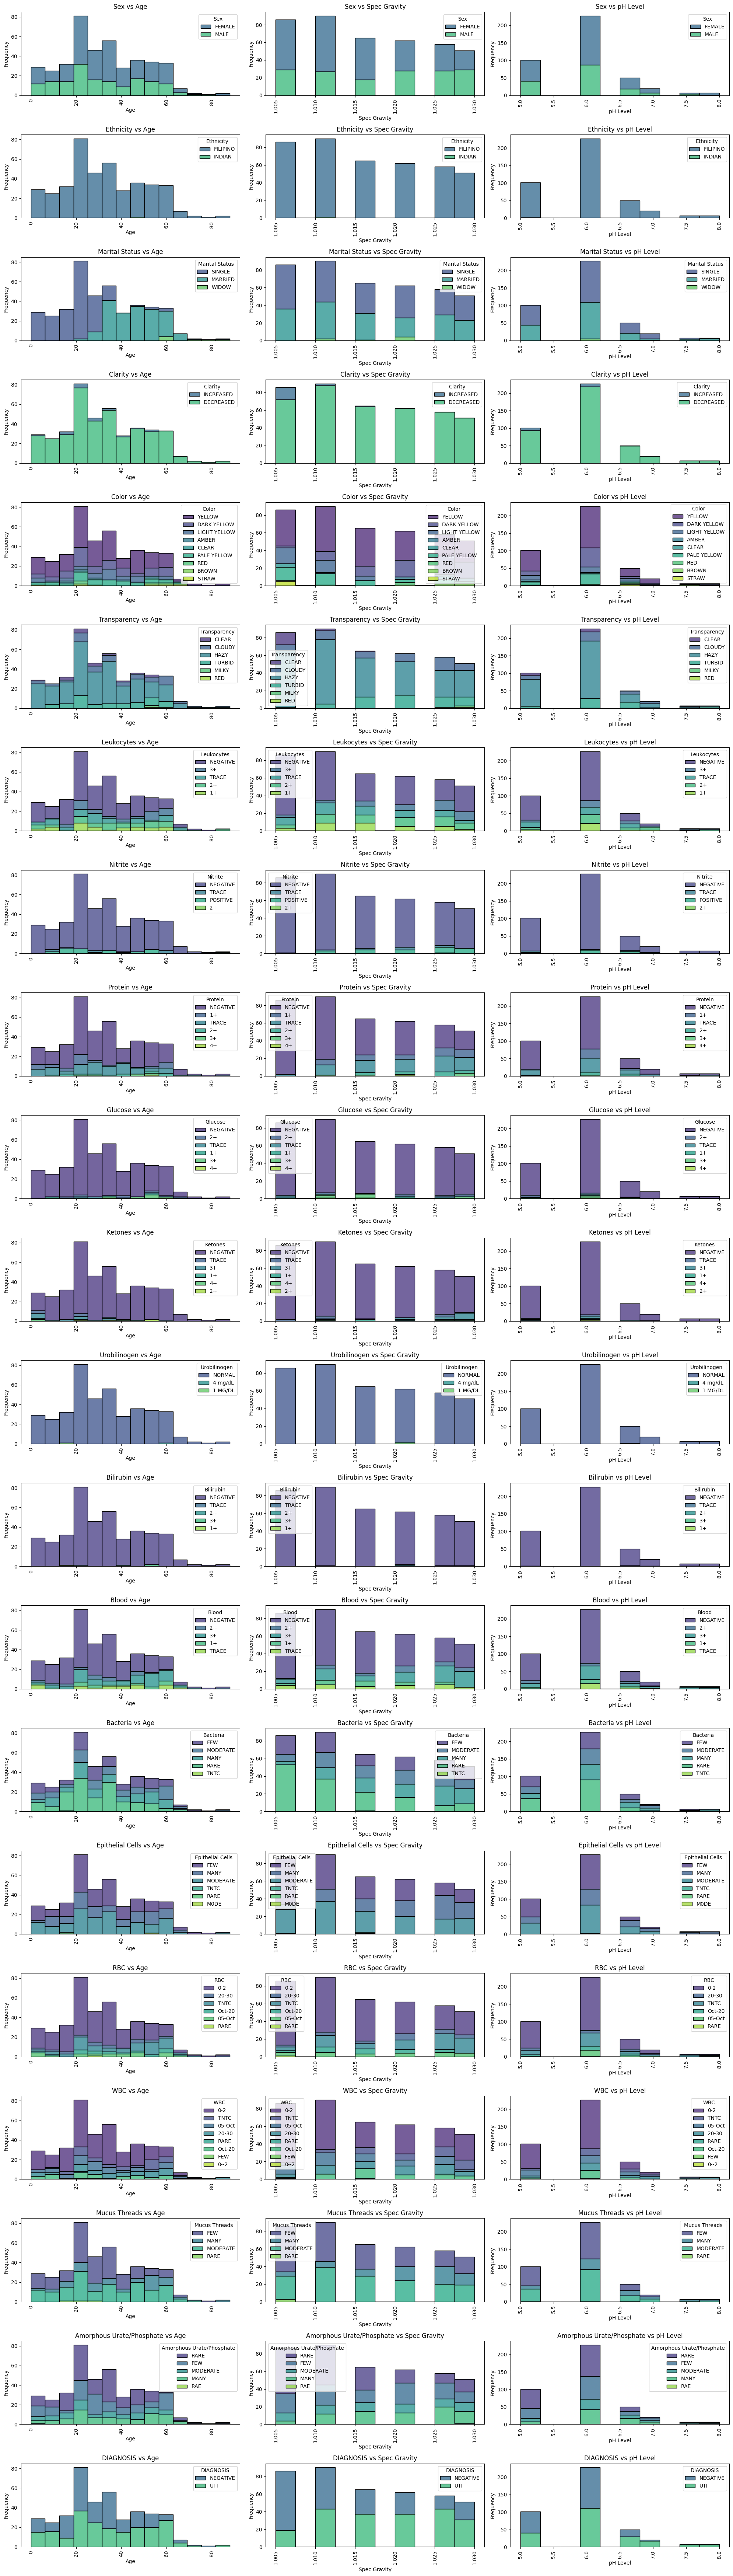

In [34]:
plt.figure(figsize=(20, 70))
k = 0
for i in cat_col:
    for j in num_col:
        plt.subplot(21, 3, k + 1)
        plt.title(i + ' vs ' + j)
        sns.histplot(data=df_uti, x=j, hue=i, multiple="stack", palette='viridis')
        plt.xlabel(j)
        plt.ylabel('Frequency')
        plt.xticks(rotation=90)
        k = k + 1
plt.tight_layout()
plt.show()

## End of Analysis

Thank you for following through the analysis. The steps and methodologies applied have provided insights into the dataset and its features. The results obtained from various statistical tests and visualizations have helped in understanding the relationships and significance of different variables in diagnosing UTI.

### Summary of Findings:
- **Data Cleaning**: Minimal null values were found and addressed.
- **Correlation Analysis**: Numerical features showed low correlation with the diagnosis, but point biserial correlation indicated significance.
- **Chi-Square Test**: Several categorical features were significantly associated with the diagnosis.
- **PCA**: Principal Component Analysis suggested the need for further feature engineering.
- **Outlier Analysis**: Identified and analyzed outliers in numerical and categorical features.
- **Univariate and Bivariate Analysis**: Provided detailed insights into the distribution and relationships of features.

This concludes the analysis. Further steps could include exploring additional features, applying advanced machine learning models, and validating the findings with external datasets.

Thank you!

-----